In [1]:
import pandas as pd
import numpy as np
import math


In [6]:
pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.5 MB/s 
     |████████████████████████████████| 83 kB 1.7 MB/s 
     |████████████████████████████████| 112 kB 45.2 MB/s 
     |████████████████████████████████| 127 kB 42.3 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=23849015ca2db8ca00bdea0e9f0416f04e0ef128d5e0a9d081410a12b706e41e
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=8e739667424b12aef76077c9880f724e41b177c3258c12042d5a9b19f6de5408
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=06eab0d98e63ea827220ba7aeba600499bc2f847d41817b0dd957

In [2]:
from datetime import date
from matplotlib import pyplot as plt
import datetime as dt
from matplotlib import dates

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
from yahoo_fin.stock_info import get_data

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

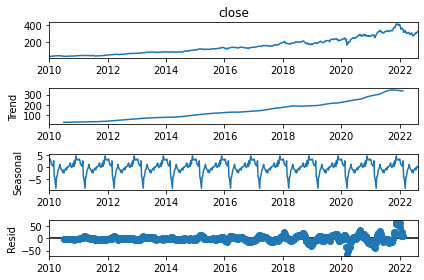

In [93]:
results = seasonal_decompose(HD_DF['close'])
results.plot();

In [92]:
HD_DF= get_data("HD", start_date="01/01/2010", end_date="08/18/2022", index_as_date = True, interval="1wk")
HD_DF

,open,high,low,close,adjclose,volume,ticker
2010-01-01,29.150000,29.219999,28.290001,29.120001,21.725132,49606600,HD
2010-01-08,29.000000,29.240000,27.889999,28.299999,21.113356,91203400,HD
2010-01-15,28.309999,29.059999,28.000000,28.480000,21.247648,69340600,HD
2010-01-22,28.240000,28.549999,27.190001,27.340000,20.397146,73323000,HD
2010-01-29,27.570000,29.049999,27.379999,27.930000,20.837317,98517600,HD
...,...,...,...,...,...,...,...
2022-07-15,294.809998,305.250000,290.950012,305.000000,305.000000,12424500,HD
2022-07-22,307.660004,310.670013,291.790009,299.630005,299.630005,14218000,HD
2022-07-29,300.000000,309.970001,297.429993,307.170013,307.170013,15677300,HD
2022-08-05,305.380005,315.799988,303.309998,310.690002,310.690002,13448700,HD


In [94]:
HD_DF.index.name = 'Date'

In [95]:
HD_DF.isna().sum()

open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64

In [96]:
HD_DF.describe()

,open,high,low,close,adjclose,volume
count,659.000000,659.000000,659.000000,659.000000,659.000000,6.590000e+02
mean,146.461290,149.882853,143.229666,146.842853,134.495902,3.273430e+07
std,95.339681,97.731513,92.916405,95.445560,96.412765,2.037986e+07
min,27.510000,28.379999,26.620001,27.340000,20.397146,8.763400e+06
25%,68.000000,69.690002,67.504997,68.724998,55.791950,1.981010e+07
50%,128.929993,131.190002,126.730003,129.300003,112.805969,2.613370e+07
75%,204.419998,209.759995,199.209999,204.000000,189.685760,3.914075e+07
max,412.190002,420.609985,404.450012,412.109985,406.306488,1.619413e+08


In [97]:
HD_DF = HD_DF.sort_values('Date')

In [98]:
close_prices = HD_DF['close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [99]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [100]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 100)               80400     
                                                                 
 dense_12 (Dense)            (None, 25)                2525      
                                                                 
 dense_13 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=4)

Epoch 1/4
468/468 [==============================] - 29s 52ms/step - loss: 0.0017
Epoch 2/4
468/468 [==============================] - 19s 40ms/step - loss: 6.6491e-04
Epoch 3/4
468/468 [==============================] - 17s 37ms/step - loss: 5.8029e-04
Epoch 4/4
468/468 [==============================] - 18s 38ms/step - loss: 4.1884e-04


In [102]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.5521411458954555

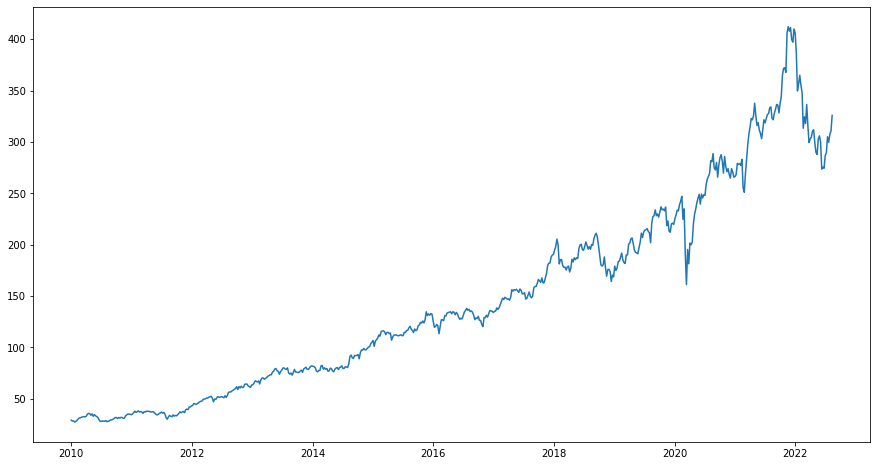

In [103]:
plt.figure(figsize=(15, 8))
plt.plot(HD_DF['close'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


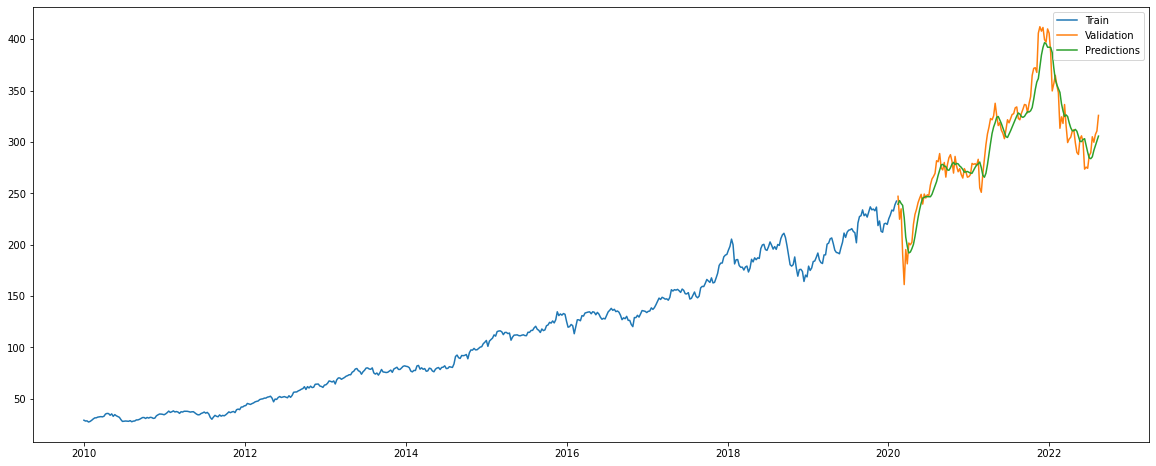

In [104]:
data = HD_DF.filter(['close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.plot(train)
plt.plot(validation[['close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])

plt.show()